In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import random
%matplotlib inline

In [2]:
frame = pd.read_csv('for_data_science_newline_fixed.csv', usecols = ["IN FILE","CLIP LENGTH","OFFSET","DURATION","MAX FREQ","MIN FREQ","SAMPLE RATE","LAST MOD BY"])
frame.head(10)

,IN FILE,CLIP LENGTH,OFFSET,DURATION,MAX FREQ,MIN FREQ,SAMPLE RATE,LAST MOD BY
0,Aburria-aburri-257423.wav,24.63350,2.3614,3.3205,24000,0,44100,alarce
1,Aburria-aburri-257423.wav,24.63350,6.7320,2.0103,24000,0,44100,alarce
2,Aburria-aburri-257423.wav,24.63350,19.2438,3.4505,24000,0,44100,alarce
3,Aburria-aburri-387212.wav,84.48000,0.6011,3.0800,24000,0,44100,alarce
4,Aburria-aburri-387212.wav,84.48000,77.6811,3.1400,24000,0,44100,alarce
5,Aburria-aburri-387212.wav,84.48000,30.4411,3.2000,24000,0,44100,alarce
6,Accipiter-bicolor-451839.wav,5.66857,0.3605,0.4399,24000,0,44100,alarce
7,Accipiter-bicolor-451839.wav,5.66857,0.9982,0.2215,24000,0,44100,alarce
8,Accipiter-bicolor-451839.wav,5.66857,0.8004,0.1949,24000,0,44100,alarce
9,Accipiter-bicolor-451839.wav,5.66857,1.2049,0.3690,24000,0,44100,alarce


In [3]:
CLIP_LENGTHS = frame.groupby("IN FILE")[["CLIP LENGTH"]].max()
SUM_DURATIONS = frame.groupby("IN FILE")[["DURATION"]].sum()

MEDIAN_DURATIONS = frame.groupby("IN FILE")[["DURATION"]].median()
MEDIAN_DURATIONS = MEDIAN_DURATIONS.rename(columns={'DURATION': 'MEDIAN DURATION'})

NUMBER_ANN = frame.groupby("IN FILE")[["OFFSET"]].count()
NUMBER_ANN = NUMBER_ANN.rename(columns = {'OFFSET':'OFFSET COUNT'})

MED_DIST_BW_ANNS = frame.copy(True)

MED_DIST_BW_ANNS = MED_DIST_BW_ANNS.sort_values(['IN FILE','OFFSET'])
MED_DIST_BW_ANNS['ENDSET'] = MED_DIST_BW_ANNS['OFFSET'] + MED_DIST_BW_ANNS['DURATION']

MED_DIST_BW_ANNS = MED_DIST_BW_ANNS[['IN FILE','CLIP LENGTH','OFFSET','ENDSET','LAST MOD BY']]

MED_DIST_BW_ANNS['PREV END'] = MED_DIST_BW_ANNS.loc[MED_DIST_BW_ANNS['IN FILE'].shift(-1) == MED_DIST_BW_ANNS['IN FILE'], 'ENDSET']
MED_DIST_BW_ANNS['PREV END'] = MED_DIST_BW_ANNS['PREV END'].shift()

MED_DIST_BW_ANNS = MED_DIST_BW_ANNS.fillna(0)
MED_DIST_BW_ANNS['DIST BETWEEN ANN PREV'] = MED_DIST_BW_ANNS['OFFSET'] - MED_DIST_BW_ANNS['PREV END']

MED_DIST_BW_ANNS['OVERLAP'] = MED_DIST_BW_ANNS['DIST BETWEEN ANN PREV'].loc[MED_DIST_BW_ANNS['DIST BETWEEN ANN PREV'] < 0]

OVER_LAP = MED_DIST_BW_ANNS.groupby('IN FILE')[['OVERLAP']].count()
OVER_LAP = OVER_LAP.rename(columns = {'OVERLAP':'OVERLAP COUNT'})

DIST_BETWEEN_ANN_PREV = MED_DIST_BW_ANNS.groupby('IN FILE')[['DIST BETWEEN ANN PREV']].median()
DIST_BETWEEN_ANN_PREV = DIST_BETWEEN_ANN_PREV.rename(columns={'DIST BETWEEN ANN PREV': 'MEDIAN DIST B/W ANNS'})

LAST_MOD_BY = MED_DIST_BW_ANNS.groupby('IN FILE')[['LAST MOD BY']].max()

WHITE_SPACE = frame.copy(True)
DUR = WHITE_SPACE.groupby(['IN FILE'])[['DURATION']].sum()
DUR = DUR.rename(columns = {'DURATION':'SUM DURATION'})
LEN = WHITE_SPACE.groupby(['IN FILE'])[['CLIP LENGTH']].max()
WHITE_SPACE = LEN.join(DUR)
WHITE_SPACE['WHITE SPACE'] = WHITE_SPACE['CLIP LENGTH'] - WHITE_SPACE['SUM DURATION']

WHITE_SPACE = WHITE_SPACE.join(OVER_LAP)
WHITE_SPACE = WHITE_SPACE.join(DIST_BETWEEN_ANN_PREV)
WHITE_SPACE = WHITE_SPACE.join(MEDIAN_DURATIONS)
WHITE_SPACE = WHITE_SPACE.join(NUMBER_ANN)
WHITE_SPACE = WHITE_SPACE.join(LAST_MOD_BY)
WHITE_SPACE.reset_index(inplace=True)
WHITE_SPACE.head(10)
# MED_DIST_BW_ANNS

,IN FILE,CLIP LENGTH,SUM DURATION,WHITE SPACE,OVERLAP COUNT,MEDIAN DIST B/W ANNS,MEDIAN DURATION,OFFSET COUNT,LAST MOD BY
0,Aburria-aburri-257423.wav,24.63350,8.7813,15.85220,0,2.36140,3.32050,3,alarce
1,Aburria-aburri-387212.wav,84.48000,9.4200,75.06000,0,26.76000,3.14000,3,alarce
2,Accipiter-bicolor-451839.wav,5.66857,4.6442,1.02437,3,0.00000,0.21550,20,alarce
3,Accipiter-collaris-260335.wav,45.37470,7.6708,37.70390,0,5.19555,1.03010,8,alarce
4,Accipiter-collaris-260336.wav,26.93220,4.8604,22.07180,1,1.03060,0.57010,8,alarce
5,Accipiter-poliogaster-121768.wav,121.75200,14.5203,107.23170,0,15.27025,2.35005,6,alarce
6,Accipiter-poliogaster-40546.wav,24.55510,7.4186,17.13650,1,0.00000,0.36990,7,alarce
7,Accipiter-striatus-481896.wav,5.59020,4.3906,1.19960,0,0.00000,0.24165,8,alarce
8,Accipiter-striatus-497793.wav,3.72000,0.3701,3.34990,0,0.90200,0.18505,2,alarce
9,Accipiter-superciliosus-329800.wav,61.88410,39.3425,22.54160,0,0.90000,2.57020,15,alarce


In [4]:
def species(row):
    species = row['IN FILE']
    spec = species.split('-')
    spec_to = '-'.join(spec[:-2])
    return spec_to

WHITE_SPACE['Genus'] = WHITE_SPACE.apply(lambda row: species(row), axis=1)
len(WHITE_SPACE['Genus'].unique())
WHITE_SPACE.head(10)

,IN FILE,CLIP LENGTH,SUM DURATION,WHITE SPACE,OVERLAP COUNT,MEDIAN DIST B/W ANNS,MEDIAN DURATION,OFFSET COUNT,LAST MOD BY,Genus
0,Aburria-aburri-257423.wav,24.63350,8.7813,15.85220,0,2.36140,3.32050,3,alarce,Aburria
1,Aburria-aburri-387212.wav,84.48000,9.4200,75.06000,0,26.76000,3.14000,3,alarce,Aburria
2,Accipiter-bicolor-451839.wav,5.66857,4.6442,1.02437,3,0.00000,0.21550,20,alarce,Accipiter
3,Accipiter-collaris-260335.wav,45.37470,7.6708,37.70390,0,5.19555,1.03010,8,alarce,Accipiter
4,Accipiter-collaris-260336.wav,26.93220,4.8604,22.07180,1,1.03060,0.57010,8,alarce,Accipiter
5,Accipiter-poliogaster-121768.wav,121.75200,14.5203,107.23170,0,15.27025,2.35005,6,alarce,Accipiter
6,Accipiter-poliogaster-40546.wav,24.55510,7.4186,17.13650,1,0.00000,0.36990,7,alarce,Accipiter
7,Accipiter-striatus-481896.wav,5.59020,4.3906,1.19960,0,0.00000,0.24165,8,alarce,Accipiter
8,Accipiter-striatus-497793.wav,3.72000,0.3701,3.34990,0,0.90200,0.18505,2,alarce,Accipiter
9,Accipiter-superciliosus-329800.wav,61.88410,39.3425,22.54160,0,0.90000,2.57020,15,alarce,Accipiter


In [5]:
# note, include taxa in the genus? reason why genus separates int clusters as well?

In [6]:
# resample if sampled is admin user
annotator = WHITE_SPACE['LAST MOD BY'].unique()
sampled_annotator = ['EdZamora'] #random.sample(list(annotator),1)
sampled_annotator # 

['EdZamora']

In [7]:
annotator_df = WHITE_SPACE[WHITE_SPACE['LAST MOD BY'].isin(sampled_annotator)]
annotator_df

,IN FILE,CLIP LENGTH,SUM DURATION,WHITE SPACE,OVERLAP COUNT,MEDIAN DIST B/W ANNS,MEDIAN DURATION,OFFSET COUNT,LAST MOD BY,Genus
22,Aeronautes-montivagus-257782.wav,20.68900,12.1193,8.56970,0,1.09030,1.88990,7,EdZamora,Aeronautes
42,Amaurolimnas-concolor-456372.wav,16.24820,15.6881,0.56010,7,0.03000,0.77990,21,EdZamora,Amaurolimnas
60,Amazonetta-brasiliensis-116242.wav,8.88000,0.8228,8.05720,0,1.40840,0.27830,3,EdZamora,Amazonetta
69,Ammodramus-humeralis-422153.wav,34.66450,8.9483,25.71620,1,0.14000,0.30990,23,EdZamora,Ammodramus
76,Anabacerthia-ruficaudata-264549.wav,13.68820,5.6851,8.00310,0,3.08320,2.84255,2,EdZamora,Anabacerthia
...,...,...,...,...,...,...,...,...,...,...
2091,Tachyphonus-phoenicius-357433.wav,97.77630,56.7480,41.02830,0,0.45990,0.93000,63,EdZamora,Tachyphonus
2177,Thamnophilus-palliatus-384653.wav,90.07200,31.1907,58.88130,0,4.87635,2.61005,12,EdZamora,Thamnophilus
2210,Thripadectes-melanorhynchus-144616.wav,25.93960,2.7600,23.17960,0,5.19490,0.67000,4,EdZamora,Thripadectes
2239,Tityra-inquisitor-493239.wav,7.18367,3.0744,4.10927,0,0.04075,0.27300,10,EdZamora,Tityra


In [8]:
genus = annotator_df['Genus'].value_counts()
sampled_genus = genus.index[:5]#random.sample(list(genus),1)
sampled_genus
# genus

Index(['Schiffornis', 'Saltator', 'Sclerurus', 'Ramphocaenus', 'Ramphotrigon'], dtype='object')

In [9]:
annotator_genus_df = annotator_df[annotator_df['Genus'].isin(sampled_genus)]
annotator_genus_df # begin PCA?

,IN FILE,CLIP LENGTH,SUM DURATION,WHITE SPACE,OVERLAP COUNT,MEDIAN DIST B/W ANNS,MEDIAN DURATION,OFFSET COUNT,LAST MOD BY,Genus
1810,Ramphocaenus-melanurus-149300.wav,73.61310,30.8374,42.77570,0,1.109900e+00,0.44995,28,EdZamora,Ramphocaenus
1811,Ramphocaenus-melanurus-27794.wav,54.04730,25.2886,28.75870,0,2.729900e+00,2.62980,11,EdZamora,Ramphocaenus
1812,Ramphocaenus-sticturus-2312.wav,10.10940,6.5372,3.57220,0,1.213000e-01,0.24270,27,EdZamora,Ramphocaenus
1813,Ramphocaenus-sticturus-424936.wav,38.83200,18.0810,20.75100,50,-1.110223e-15,0.19000,98,EdZamora,Ramphocaenus
1814,Ramphocaenus-sticturus-91665.wav,21.34200,8.7208,12.62120,0,3.160300e+00,2.95020,3,EdZamora,Ramphocaenus
1815,Ramphocaenus-sticturus-91680.wav,53.42040,29.1900,24.23040,56,0.000000e+00,0.17000,151,EdZamora,Ramphocaenus
1823,Ramphotrigon-fuscicauda-102716.wav,23.18400,10.5472,12.63680,0,8.728000e-01,0.95970,11,EdZamora,Ramphotrigon
1824,Ramphotrigon-fuscicauda-229017.wav,51.76800,20.1693,31.59870,0,1.690050e+00,3.24490,8,EdZamora,Ramphotrigon
1826,Ramphotrigon-megacephalum-206161.wav,21.99510,3.3693,18.62580,0,3.049350e+00,0.59485,6,EdZamora,Ramphotrigon
1828,Ramphotrigon-ruficauda-27821.wav,54.15180,10.9202,43.23160,0,5.195200e+00,1.35500,8,EdZamora,Ramphotrigon


In [10]:
knn_data = annotator_genus_df[['LAST MOD BY','Genus','SUM DURATION','MEDIAN DURATION','OVERLAP COUNT','OFFSET COUNT','CLIP LENGTH','WHITE SPACE']].copy(True)
knn_data

,LAST MOD BY,Genus,SUM DURATION,MEDIAN DURATION,OVERLAP COUNT,OFFSET COUNT,CLIP LENGTH,WHITE SPACE
1810,EdZamora,Ramphocaenus,30.8374,0.44995,0,28,73.61310,42.77570
1811,EdZamora,Ramphocaenus,25.2886,2.62980,0,11,54.04730,28.75870
1812,EdZamora,Ramphocaenus,6.5372,0.24270,0,27,10.10940,3.57220
1813,EdZamora,Ramphocaenus,18.0810,0.19000,50,98,38.83200,20.75100
1814,EdZamora,Ramphocaenus,8.7208,2.95020,0,3,21.34200,12.62120
1815,EdZamora,Ramphocaenus,29.1900,0.17000,56,151,53.42040,24.23040
1823,EdZamora,Ramphotrigon,10.5472,0.95970,0,11,23.18400,12.63680
1824,EdZamora,Ramphotrigon,20.1693,3.24490,0,8,51.76800,31.59870
1826,EdZamora,Ramphotrigon,3.3693,0.59485,0,6,21.99510,18.62580
1828,EdZamora,Ramphotrigon,10.9202,1.35500,0,8,54.15180,43.23160


In [11]:
X = knn_data.drop(columns = ['Genus','LAST MOD BY']) # expand to taxa rather than species

Y = np.array(knn_data['Genus'])
Y_2 = np.array(knn_data['LAST MOD BY'])
len(Y)

36

In [12]:
X

,SUM DURATION,MEDIAN DURATION,OVERLAP COUNT,OFFSET COUNT,CLIP LENGTH,WHITE SPACE
1810,30.8374,0.44995,0,28,73.61310,42.77570
1811,25.2886,2.62980,0,11,54.04730,28.75870
1812,6.5372,0.24270,0,27,10.10940,3.57220
1813,18.0810,0.19000,50,98,38.83200,20.75100
1814,8.7208,2.95020,0,3,21.34200,12.62120
1815,29.1900,0.17000,56,151,53.42040,24.23040
1823,10.5472,0.95970,0,11,23.18400,12.63680
1824,20.1693,3.24490,0,8,51.76800,31.59870
1826,3.3693,0.59485,0,6,21.99510,18.62580
1828,10.9202,1.35500,0,8,54.15180,43.23160


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
scaler.fit(X)
X_standardized = scaler.transform(X)
X_standardized = pd.DataFrame(X_standardized, columns = X.columns)

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3, random_state = 0)
pca.fit(X_standardized)
X_dim_reducted = pca.transform(X_standardized)
X_dim_reducted

array([[ 1.99723879e+00, -1.34140204e+00,  2.52566711e-03],
       [ 9.87438915e-02, -1.22353185e+00, -1.75983185e+00],
       [-1.09845825e+00,  1.78744925e+00,  8.83284109e-01],
       [ 3.46187545e+00,  3.34775853e+00,  2.31640838e-02],
       [-1.85845211e+00,  9.42844958e-02, -1.32351711e+00],
       [ 5.51291150e+00,  3.73009649e+00, -7.27944399e-01],
       [-9.88394638e-01,  7.01505521e-01,  2.42136984e-01],
       [-3.55755963e-01, -1.39746463e+00, -1.90511178e+00],
       [-1.18596682e+00,  6.83446606e-01,  1.12497607e+00],
       [ 9.86908065e-02, -1.13966440e+00,  5.06641754e-01],
       [ 1.26488583e+00, -2.84800855e+00,  1.13307108e+00],
       [-1.80918989e+00,  5.63801227e-01, -3.72194632e-01],
       [-2.63924843e-01, -1.73604201e-03,  1.27319559e+00],
       [-1.92022084e+00,  5.85330452e-01, -6.27335873e-01],
       [-1.16765548e+00,  2.89763401e-01, -5.88401001e-02],
       [-5.80651077e-01, -6.53817499e-01,  7.50595016e-01],
       [-8.81192519e-01, -3.34029856e-01

In [15]:
boba = pd.DataFrame(X_dim_reducted, columns = ['PCA1','PCA2','PCA3']) # ,'PCA4','PCA5','PCA6'
boba # knn on this

,PCA1,PCA2,PCA3
0,1.997239,-1.341402,0.002526
1,0.098744,-1.223532,-1.759832
2,-1.098458,1.787449,0.883284
3,3.461875,3.347759,0.023164
4,-1.858452,0.094284,-1.323517
5,5.512911,3.730096,-0.727944
6,-0.988395,0.701506,0.242137
7,-0.355756,-1.397465,-1.905112
8,-1.185967,0.683447,1.124976
9,0.098691,-1.139664,0.506642


In [16]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.scatterplot(x = 'PCA1', y='PCA2',hue = Y, palette=sns.color_palette("hls", 5), data = boba)
# plt.show()

In [17]:
# import plotly.express as px 

# fig = px.scatter_3d(boba, x="PCA1", y="PCA2", z='PCA3',color = Y, color_discrete_sequence= px.colors.qualitative.G10)

# fig.show()

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [19]:
# scaler = MinMaxScaler()

# scaler.fit(boba[['PCA1']])
# boba['PCA1'] = scaler.transform(boba[['PCA1']])

# scaler.fit(boba[['PCA2']])
# boba['PCA2'] = scaler.transform(boba[['PCA2']])

# scaler.fit(boba[['PCA2']])
# boba['PCA2'] = scaler.transform(boba[['PCA2']])

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
scaler.fit(boba)
boba_standardized = scaler.transform(boba)
boba_standardized = pd.DataFrame(boba_standardized, columns = boba.columns)

In [21]:
boba_standardized['LAST MOD BY'], boba_standardized['Genus'] = Y_2, Y
# boba

In [22]:
clust = len(boba_standardized['Genus'].unique())
clust

5

In [23]:
clust_ann = len(boba_standardized['LAST MOD BY'].unique())
clust_ann

1

In [24]:
km = KMeans(n_clusters = clust)
y_predicted = km.fit_predict(boba_standardized[['PCA1','PCA2','PCA3']])
y_predicted

array([1, 3, 4, 2, 0, 2, 4, 3, 4, 1, 1, 0, 4, 0, 4, 4, 4, 4, 4, 0, 0, 0,
       4, 1, 4, 4, 1, 1, 3, 4, 3, 3, 0, 4, 4, 1])

In [25]:
boba_standardized['cluster'] = y_predicted
boba_standardized

,PCA1,PCA2,PCA3,LAST MOD BY,Genus,cluster
0,1.233073,-1.001704,0.002425,EdZamora,Ramphocaenus,1
1,0.060963,-0.913683,-1.689512,EdZamora,Ramphocaenus,3
2,-0.678176,1.334794,0.847990,EdZamora,Ramphocaenus,4
3,2.137323,2.499968,0.022238,EdZamora,Ramphocaenus,2
4,-1.147388,0.070408,-1.270632,EdZamora,Ramphocaenus,0
5,3.403610,2.785482,-0.698857,EdZamora,Ramphocaenus,2
6,-0.610224,0.523855,0.232462,EdZamora,Ramphotrigon,4
7,-0.219640,-1.043569,-1.828987,EdZamora,Ramphotrigon,3
8,-0.732203,0.510370,1.080024,EdZamora,Ramphotrigon,4
9,0.060931,-0.851054,0.486397,EdZamora,Ramphotrigon,1


C:\Users\lianl\anaconda3\envs\tweety\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


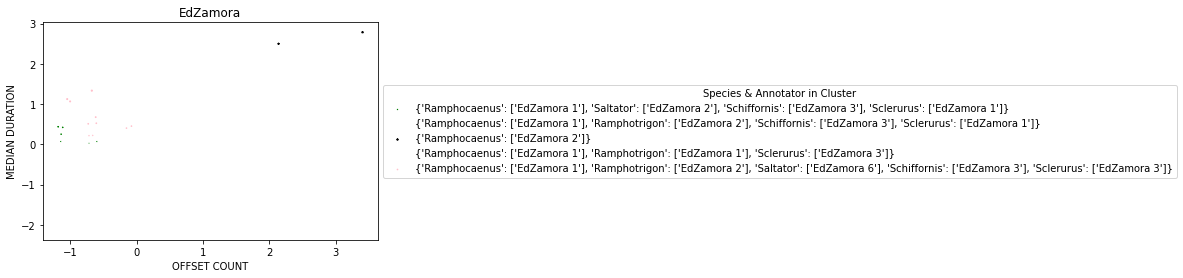

In [26]:
knn_data = boba_standardized.copy(True)

df1 = knn_data[knn_data.cluster == 0]
df2 = knn_data[knn_data.cluster == 1]
df3 = knn_data[knn_data.cluster == 2]
df4 = knn_data[knn_data.cluster == 3]
df5 = knn_data[knn_data.cluster == 4]

plot1 = plt.scatter(df1['PCA1'],df1['PCA2'],df1['PCA2'],color = 'green',marker = 'x')
plot2 = plt.scatter(df2['PCA1'],df2['PCA2'],df2['PCA2'],color = 'red',marker = '^')
plot3 = plt.scatter(df3['PCA1'],df3['PCA2'],df3['PCA2'],color = 'black',marker = '*')
plot4 = plt.scatter(df4['PCA1'],df4['PCA2'],df4['PCA2'],color = 'blue',marker = '+')
plot5 = plt.scatter(df5['PCA1'],df5['PCA2'],df5['PCA2'],color = 'pink',marker = 'o')

# lab1 = dict((df1['LAST MOD BY']+' '+df1['Genus']).value_counts())
# lab2 = dict((df2['LAST MOD BY']+' '+df2['Genus']).value_counts())
# lab3 = dict((df3['LAST MOD BY']+' '+df3['Genus']).value_counts())
# lab4 = dict((df4['LAST MOD BY']+' '+df4['Genus']).value_counts())
# lab5 = dict((df5['LAST MOD BY']+' '+df5['Genus']).value_counts())

lab1 = df1[['LAST MOD BY','Genus']].groupby(['Genus','LAST MOD BY'])[['LAST MOD BY']].count().rename(columns = {"LAST MOD BY":'COUNT'}).reset_index()
lab1['LAST MOD BY'] = (lab1['LAST MOD BY']+' '+lab1['COUNT'].astype(str))
lab1 = lab1.drop(columns = ['COUNT']).groupby('Genus')['LAST MOD BY'].apply(list).to_dict()

lab2 = df2[['LAST MOD BY','Genus']].groupby(['Genus','LAST MOD BY'])[['LAST MOD BY']].count().rename(columns = {"LAST MOD BY":'COUNT'}).reset_index()
lab2['LAST MOD BY'] = (lab2['LAST MOD BY']+' '+lab2['COUNT'].astype(str))
lab2 = lab2.drop(columns = ['COUNT']).groupby('Genus')['LAST MOD BY'].apply(list).to_dict()

lab3 = df3[['LAST MOD BY','Genus']].groupby(['Genus','LAST MOD BY'])[['LAST MOD BY']].count().rename(columns = {"LAST MOD BY":'COUNT'}).reset_index()
lab3['LAST MOD BY'] = (lab3['LAST MOD BY']+' '+lab3['COUNT'].astype(str))
lab3 = lab3.drop(columns = ['COUNT']).groupby('Genus')['LAST MOD BY'].apply(list).to_dict()

lab4 = df4[['LAST MOD BY','Genus']].groupby(['Genus','LAST MOD BY'])[['LAST MOD BY']].count().rename(columns = {"LAST MOD BY":'COUNT'}).reset_index()
lab4['LAST MOD BY'] = (lab4['LAST MOD BY']+' '+lab4['COUNT'].astype(str))
lab4 = lab4.drop(columns = ['COUNT']).groupby('Genus')['LAST MOD BY'].apply(list).to_dict()

lab5 = df5[['LAST MOD BY','Genus']].groupby(['Genus','LAST MOD BY'])[['LAST MOD BY']].count().rename(columns = {"LAST MOD BY":'COUNT'}).reset_index()
lab5['LAST MOD BY'] = (lab5['LAST MOD BY']+' '+lab5['COUNT'].astype(str))
lab5 = lab5.drop(columns = ['COUNT']).groupby('Genus')['LAST MOD BY'].apply(list).to_dict()

plt.xlabel('OFFSET COUNT')
plt.ylabel('MEDIAN DURATION')
plt.legend([plot1, plot2, plot3, plot4,plot5], [lab1, lab2, lab3, lab4,lab5],loc='center left', bbox_to_anchor=(1, 0.5),title = 'Species & Annotator in Cluster')
plt.title(' & '.join(knn_data['LAST MOD BY'].unique()))
plt.show()